# The Harris-Todaro Model
## Migration, urban-bias, and the informal sector

This model adapts a standard open-economy two-sector specific factors model (SFM) to study impediments and frictions in the structural transformation process.  

* The two sectors are agriculture and 'modern-manufacturing'
* Labor is mobile across the two sectors. The agricultural labor market is competitive. 

If the labor market in the modern manufacturing sector were also competitive this would be a standard model and labor would move until the wage was equalized across sector to a common market-clearing equilibrium wage $w^e$, at which point the sum of labor demands from each sector would equal the economy-wide labor supply $\bar L$.

$$L_a (w^e) + L_m (w^e) = \bar L $$

However, for institutional/political economy reasons, wages in one part of urban sector will be set artificially high, for example because of union activity or minimum-wage policies in that sector in a protected manufacturing sector. This institutionally imposed high wage will lead firms in that sector to cut back hiring but it will also attract migrants to urban areas, lured by the prospect of possibly landing a high-wage job in the urban sector.  

Laborers can now either stay in the rural sector to earn wage equilibrium rural wage $w_r$ or migrate to the urban area where they may land either in 

  (a) the informal sector where they earn a low-productivity determined wage $w_u$ or 
  
  (b) in the high-wage modern manufacturing sector where they earn the institutionally-determined wage $w_m$. 
  
  The model assumes only urban dwellers can apply for modern-manufacturing and that jobs will be allocated via a lottery whenever jobs are in excess demand. 

  Depending on economic conditions the equilibrium outcome may be either inefficiently low migration or, under difference circumstances, an inefficiently large urban sector and 'urban-bias' (a larger than efficient urban with a large informal sector).  

### Equilibrium migration

Labor demand in each sector will depend on product prices. Without loss of generality and to simplify let's normalize $P_r = 1$ and now call $p = \frac{P_r}{P_m}$ the relative price of agricultural goods. 

Rural labor demand $L_r(w)$ is found from

$$p \cdot F_L(\bar T, L_r) = w$$

and modern manufacturing sector labor demand $L_m(w)$ is from

$$G_L(\bar K, L_m) = w$$

In equilibrium, labor in the urban formal and informal sector plus rural labor must add up to available supply.
$$
L_m + L_u + L_r = \bar L
$$


Given the assumption that jobs in the high-wage manufacturing sector are allocated by fair lottery the equilibium probability of getting such a job will be given simply by the share of the urban sector labor force in that sector. 

Migration will take place until the rural wage is equalized to the *expected* wage of an urban resident:

$$w_r = \frac{L_m (w_m)}{L_u + L_m (w_m)} \cdot w_m  + \frac{L_u}{L_u + L_m (w_m)} \cdot w_u $$

Without loss of generality, lets normalize the informal sector wage $w_u=0$ (we'll change that later). The condition then simplifies to:

$$w_r = \frac{L_m (w_m)}{L_u + L_m (w_m)} \cdot w_m  $$

As $w_m$ is set exogenously by policy, labor use in the modern manufacturing sector will be fixed at $L_m (w_m)$.  Using the fact that $(L_u+L_m = \bar L - L_r)$, This condition can be re-written as:

$$ w_m \cdot L_m = w_r \cdot ({\bar L  - L_r})  $$

Since $\bar L$, $w_m$ and $L_m = L_m(w_m)$ are all fixed quantities, this is an equation in two unknowns $w_r$ and $L_r$. We can solve for the two unknowns from a system of two equations. 

The first is this last equation which is a rectangular hyperbola of the form $x \cdot y = \kappa$, where here $x = \bar L - L_r$ and $y = w_r$).  

The other equation is the rural competitive factor pricing condition 

$$p \cdot F_L(\bar K_r, L_r) = w_r$$

###  Diagram analysis

Although this is a simple system of two non-linear equations in two unknowns, it's hard to get a tidy closed form solution for Cobb Douglas production functions. It is however easy to see the solution graphically and solve for it numerically. 

Suppose production in the agricultural and manufacturing were carried out by identical firms in each sector each employing the linear homogenous Cobb-Douglas technologies:

$$G(\bar T, L_r)=A_r \bar T^{\alpha} \cdot  L_r^{1-\alpha}$$

$$F(\bar K, L_m)=A_m \bar K^{\beta} \cdot  L_m^{1-\beta}$$

Labor demand in manufacturing as a function of $w$:

$$L_m(w_m) = \left [ { \frac{A_m (1-\beta) \bar K}{w_m/P_m} } \right ]^\frac{1}{\beta} $$


and rural labor demand:

$$L_r(w_r) = \left [ { \frac{A_r (1-\alpha) \bar T}{w_r/P_r} } \right ]^\frac{1}{\alpha} $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.optimize import bisect, fsolve, newton
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [2]:
Tbar = 200       # Fixed specific land in ag. 
Kbar = 200       # Fixed specific capital in manuf
Lbar = 400       # Total number of mobile workers
LbarMax = 400    # Lbar will be on slider, max value.
A = 1
p    = 1.00      # initial rel price of ag goods, p = Pa/Pm
alpha, beta = 0.75, 0.5  # labor share in ag, manuf

In [3]:
def F(L,T, A=1, alpha=0.5):
    return A*(T**alpha)*(L**(1-alpha))

def G(L, K, A=1, beta=0.5):
    return A*(K**beta)*(L**(1-beta))

def mplr(L,T=Tbar, A=1, alpha=0.5):
    return (1-alpha)*F(L,T,A,alpha)/L

def mplm(L, K=Kbar, A=1, beta=0.5):
    return (1-beta)*G(L,K,A,beta)/L

def Lm(w, Kbar=Kbar, A=A, beta=beta):
    return  Kbar*((p/w)*(A*(1-beta)))**(1/beta)

def expret(Lr, wm):
    return wm*Lm(wm)/(Lbar-Lr)

def expwage(Lr, wm, wu):
    return (wm*Lm(wm) + wu*(Lbar-Lm(wm)-Lr) )/(Lbar-Lr)

The **efficient competitive equilibrium** is given by the point where these two labor demand curves intersect. We solve for the level of agricultural employment at which there is zero excess demand for agricultural labor. This gives an equilibrium agricultural labor demand economy-wide equilibrium wage.

In [4]:
def effeq():
    '''Find efficient market equilibrium and labor allocation'''
    ed = lambda L: mplr(L) - mplm(Lbar-L)
    L = Lbar/2   # guess
    LE = fsolve(ed, L)[0]
    return mplr(LE), LE

A Harris-Todaro equilibrium is one where the rural wage equals the expected urban wage.  Diagramatically the equilibrium level of rural employtment is given by the intersection of the rural labor demand curve and the rectangular hyperbola running through $(w_m, L_m(w_m))$.

In [5]:
def harristodaro(wm, wu):
    LM = Lm(wm)
    WE, LE = effeq()
    hteq = lambda L: mplr(L) - (wm*LM + wu*(Lbar-LM-L) )/(Lbar-L)
    L = Lbar/2
    LR = fsolve(hteq, L)[0]
    WR =  mplr(LR)
    return WR, LR, LM, WE, LE

def gdpratio(wm, wu):
    '''Returns actual gdp as percent ofefficient possible.'''
    WR, LR, LM, WE, LE = harristodaro(wm, wu)
    gdpe = F(LE, Tbar, A, alpha) + p * G(Lbar-LE, Kbar, A, beta)
    gdp =  F(LR, Tbar, A, alpha) + p * G(LM, Kbar, A,  beta) + wu*(Lbar - LR - LM)
    return 100*gdp/gdpe

This next function plots the diagram.

In [6]:
def HTplot(wm, wu):
    WR, LR, LM, WE, LE = harristodaro(wm, wu)
    lr = np.arange(1,Lbar)
    lup = np.arange(LR-20, Lbar-LM+20)  # plot over shorter range to avoid clutter
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(lr[:-50], mplr(lr[:-50]), lw=2)
    ax.plot(lr[50:], mplm(Lbar-lr[50:]), lw=2)
    ax.plot(lup, expwage(lup, wm, wu), 'k',lw=1.5)
    ax.vlines(LR,0,WR, linestyles="dashed")
    ax.vlines(Lbar-LM,0,wm,linestyles="dashed")
    ax.hlines(wm,Lbar,Lbar-LM, linestyles="dashed")
    ax.hlines(WR,LR,Lbar, linestyles="dashed")
    ax.plot(Lbar-LM,wm,'ob')
    ax.text(Lbar,wm,'$w_m$',fontsize=16)
    ax.text(LE,WE*1.05,'$E$',fontsize=16)
    ax.text(LR, WR*1.10,'$Z$',fontsize=16)
    ax.text(Lbar-LM-10,wm*1.05,'$D$',fontsize=16)
    ax.text(Lbar, WR,'$w_r$',fontsize=16)
    ax.plot([LE,LR, Lbar-LM],[WE, WR, wm],'ok')
    ax.arrow(0, -0.05, LR-10, 0, head_width = 0.025, head_length = 5, clip_on = False)
    ax.text(LR/2, -0.12,'$L_r$',fontsize=16)
    ax.arrow(LR+3, -0.05, Lbar-LM-LR-10, 0, head_width = 0.025, head_length = 5, clip_on = False)
    ax.arrow(Lbar-LM, -0.05, - (Lbar-LM-LR-10) , 0, head_width = 0.025, head_length = 5, clip_on = False)
    ax.text(LR + (Lbar-LR-LM)/2, -0.12,'$L_u$',fontsize=16)
    ax.arrow(Lbar, -0.05, -(LM-10) , 0, head_width = 0.025, head_length = 5, clip_on = False)
    ax.text(Lbar-LM/2, -0.12,'$L_m$',fontsize=16)
    ax.set_xlim(0, Lbar)
    ax.set_ylim(0, 1.25)
    ax.set_xlabel(r'$c_1$', fontsize=18)
    ax.set_ylabel('$c_2$', fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.get_xaxis().set_visible(False)
    print(f'(wm, wr, wu) = ({wm:0.2f}, {WR:0.2f}, {wu:0.2f}); gdp loss = {100-gdpratio(wm,wu):0.0f}%', end ='')
    if LR > LE:
        print('  Inefficiently large ag sector')
    elif LR<LE:    
        print('  Urban Bias')

The high institutional wage $w_m$ lowers demand for labor in the formal manufacturing sector relative to a competitive equilibiurm. In the Harris-Todaro model it's not apriori obvious whether the high institutional wage in the formal manufacturing sector will increase or decrease the size of the urban sector relative to the efficient competitive equilibrium.  Migrants have to weigh the lower probability of landing a formal sector job against the higher wage they will capture if they are lucky enough to get a job.  

### Inefficiently large agricultural sector
If we assume the informal sector (or unemployment) wage is zero, then for our Cobb-Douglas demands the following diagram suggests the policy creates an informal urban sector but overall reduces the size of the size of the urban sector relative to the rural sector, compared to the efficient competitive equilibrium. 

(wm, wr, wu) = (0.90, 0.43, 0.00); gdp loss = 18%  Inefficiently large ag sector


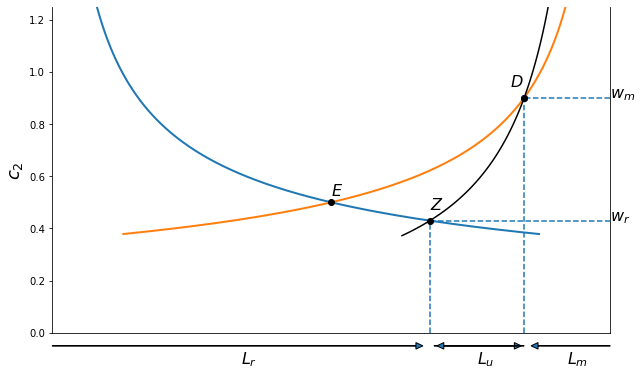

In [7]:
HTplot(wm = 0.9, wu = 0)

### Urban Bias

If we make the informal sector sufficiently attractive it is possible to get 'urban-bias' or an excessively small agricultural sector relative to the efficient allocation. 

For the following diagram we first make note of the efficient equilibrium wage and rural sector size:

In [8]:
WE, LE = effeq()
print('The efficient competitive wage is w ={:5.2f} and the rural sector is Lr ={:5.0f}'.format(WE, LE))

The efficient competitive wage is w = 0.50 and the rural sector is Lr =  200


Suppose that workers in the informal sector have access to a low-productivity occupation which pays a wage below this efficient level.  That means that in an efficient allocation workers would earn more in either formal manufacturing or the rural sector and hence there would be no informal sector in equilibrium. 

However, the existence of this low-productivity option in the urban informal sector raises the expected return to migration in the Harris-Todaro distorted equilibrium. This may result in a smaller than efficient rural sector, as illustrated below:

(wm, wr, wu) = (0.90, 0.56, 0.45); gdp loss = 5%  Urban Bias


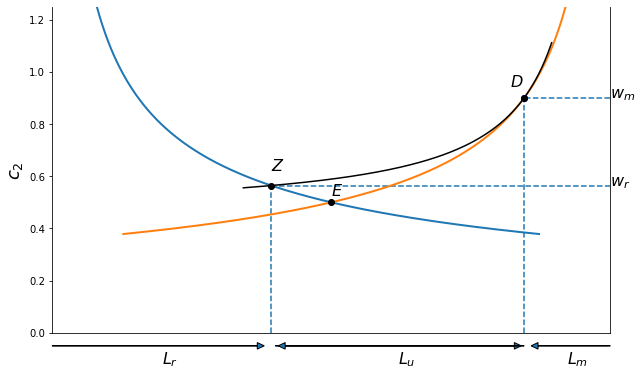

In [9]:
HTplot(wm = 0.9, wu = 0.45)

### Interactive plot

interactive(children=(FloatSlider(value=1.1, description='wm', max=1.7500000000000004, min=0.5000000000000001,…

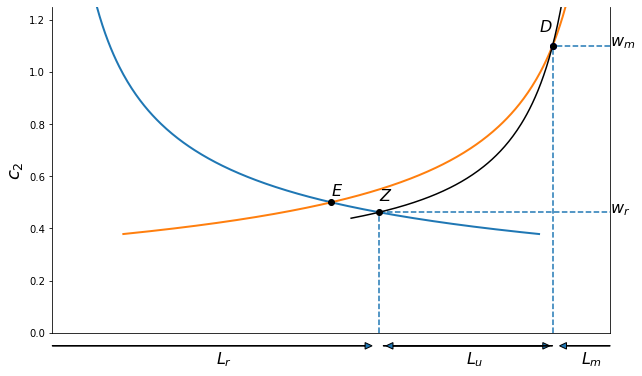

In [10]:
interact(HTplot, wm =(WE,3.5*WE,0.05), wu=(0,WE,0.05));

### Extensions

#### Harris Todaro and Inequality

Jonathan Temple's (2005) "[Growth and Wage Inequality in a dual economy](http://www.efm.bris.ac.uk/ecjrwt/abstracts/templeberfinalversion.pdf)" makes some simple points about wage inequality in the HT model.  He shows that in the case of $wu = $ the Gini coefficient can be written simply:

$$Gini = L_u(2-\frac{L_u}{u})$$

where here $L_u$ is the *proportion* of the labor force in unemployment and $u$ (slightly redefining what we had above... or, same thing, if we normalize the total labor force to 1) and $u$ is urban unemployment rate or the fraction of the unemployed in the urban population (i.e. $u=\frac{L_u}{L_u+L_m}$).  From this one can prove that inequality will unambiguously rise if one of the following statements holds if the urban unemployment rate $u$:

 - rises, and the number of unemployed $L_u$ goes up.
 - is constant, and the number of unemployed $L_u$ rises. Modern sector employment rises, and agricultural employment falls.
 - rises, and the number of unemployed is constant. Modern sector employment falls, and agricultural employment rises
 
Another result is that rural growth (driven say by improved agricultural technology) leads to an unambiguous reduction in wage inequality. The effects of urban growth are ambiguous.  

Below we plot the Lorenz curve and slightly extend Temple's analysis to the case where 'the unemployed' (or informal sector workers) earn a non-zero wage.  For now we simply focus on calculating the Gini numerically. 

(note/fix: GINI CALCULATION DOES NOT SEEM RIGHT)

In [11]:
def htlorenz(wm, wu):
    WR, LR, LM, WE, LE = harristodaro(wm, wu)
    lrp = LR/Lbar
    lmp = LM/Lbar
    lup = 1 - lrp -lmp
    ytot = wu*(1-lrp-lmp) + WR*lrp + wm*lmp
    yup = wu*(1-lrp-lmp)/ytot
    yrp = WR*lrp/ytot
    ymp = wm*lmp/ytot
    A = 0.5 - (yup*((1-lup)+ 0.5*lup)+(yrp-yup)*(lmp+0.5*lrp)+0.5*lmp*(ymp))
    Gini = 2*A
    gtext = "Gini ={:5.2f}".format(Gini)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot([0,lup,lup+lrp,1],[0,yup,yup+yrp,1] , lw=2)
    ax.plot([0,1],[0,1], 'k--', lw=1)
    ax.text(0.2,0.8,gtext,fontsize=16)

interactive(children=(FloatSlider(value=1.1, description='wm', max=1.7500000000000004, min=0.5000000000000001,…

<function __main__.htlorenz(wm, wu)>

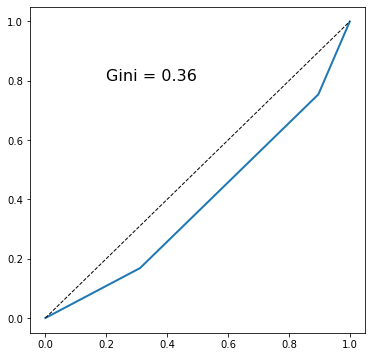

In [12]:
WM, WU = 0.9,0
WR, LR, LM, WE, LE = harristodaro(WM, WU)
interact(htlorenz, wm =(WE,3.5*WE,0.05),wu=(0,WE,0.05))